<a href="https://colab.research.google.com/github/luispky/EPIC_2/blob/main/Day1/Basics-2/homework/team_bio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework: Python Basics

## Team Name: bio_1

## Team Members: Goran Giudetti, Luis Palacios

## Instructions and initial task:

The purpose of this assignment is to find the characteristic index of the turbulence energy cascade of a snapshot taken from a subsonic turbulence simulation. The spectrum scales, so for simplicity we will work in code units.

You should upload the following simulation file (turbulence_sub_hr.vtk) to your Drive:

https://github.com/ciencialatitud0/EPIC_2/tree/main/Day1/Basics-2/homework/homework_data

**Please work with your team mates and produce a single python notebook per group.** When you finish, ask one of the group members to place the notebook onto the EPIC 2 github repository (we recommend to fork the repository, add the notebook to the Day1/Basics-2/homework/ in your account, and then do a pull request).

To get you started I have added a few lines to open the VTK simulation file and make a plot. First, you should reproduce this on Google Colab.

### Reference: 

https://github.com/ciencialatitud0/EPIC_2/blob/main/Day1/Basics-2/2d_python_II_CFDdata.ipynb

In [2]:
# First let's mount our Drive folder:

from google.colab import drive
drive.mount('/content/drive')

# # To display the contents

# !ls "/content/drive/My Drive"

Mounted at /content/drive


In [4]:
pwd

'/content'

In [5]:
# Then, we need to install pyvista

!pip install pyvista

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 5.2 MB/s 
     |████████████████████████████████| 79.3 MB 1.1 MB/s 


In [8]:
# Import useful libraries

import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Indicate the working directory

input_directory="/content/drive/My Drive/EPIC2/Day1/Basics-2/homework/homework_data/"
file_name = "turbulence_sub_hr.vtk"

In [15]:
# Read the mesh
mesh = pv.read(input_directory+file_name)

print(mesh)

RectilinearGrid (0x7f44bc833f30)
  N Cells:	40000
  N Points:	40401
  X Bounds:	-2.000e+00, 2.000e+00
  Y Bounds:	-2.000e+00, 2.000e+00
  Z Bounds:	0.000e+00, 0.000e+00
  Dimensions:	201, 201, 1
  N Arrays:	5



In [16]:
# Now, we read all the scalar and vector quantities

rho = pv.get_array(mesh, "rho", preference = 'cell') # density in code units
vx1 = pv.get_array(mesh, "vx1", preference = 'cell') # x velocity component in code units
vx2 = pv.get_array(mesh, "vx2", preference = 'cell') # y velocity component in code units
Bx1 = pv.get_array(mesh, "Bx1", preference = 'cell') # x magnetic field component in code units
Bx2 = pv.get_array(mesh, "Bx2", preference = 'cell') # y magnetic field component in code units

In [17]:
rho.shape

(40000,)

In [18]:
# The above arrays are 1D, so we need to make them 2D
# To check you can run: print(rho.shape)

rho_2D = rho.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
vx1_2D = vx1.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
vx2_2D = vx2.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
Bx1_2D = Bx1.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
Bx2_2D = Bx2.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)

In [19]:
rho_2D.shape

(200, 200)

In [20]:
# Create a 2D grid using metadata information

x = np.linspace(mesh.bounds[0], mesh.bounds[1], mesh.dimensions[0] - 1)
y = np.linspace(mesh.bounds[2], mesh.bounds[3], mesh.dimensions[1] - 1)

X, Y = np.meshgrid(x, y)

In [21]:
type(mesh)

pyvista.core.grid.RectilinearGrid

In [22]:
mesh

RectilinearGrid (0x7f44bc833f30)
  N Cells:	40000
  N Points:	40401
  X Bounds:	-2.000e+00, 2.000e+00
  Y Bounds:	-2.000e+00, 2.000e+00
  Z Bounds:	0.000e+00, 0.000e+00
  Dimensions:	201, 201, 1
  N Arrays:	5

In [23]:
plt.rc('font', size=18) 

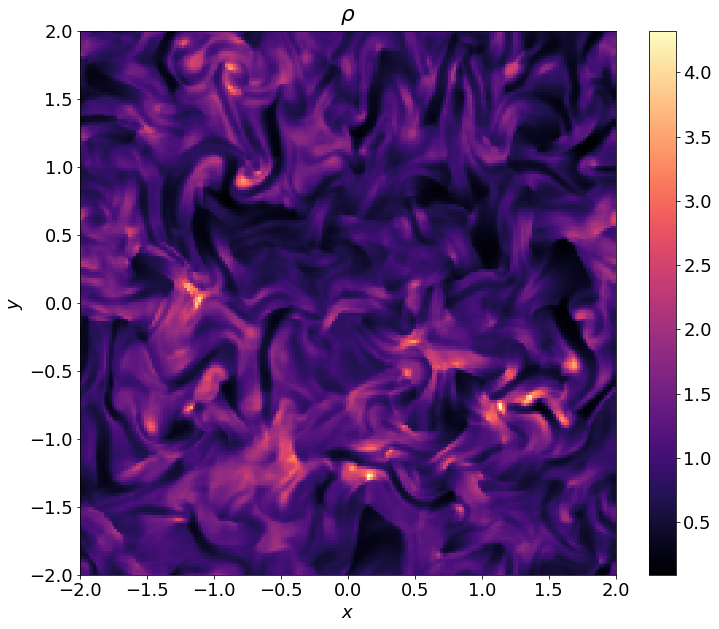

In [24]:
# And we are ready to interpolate our data onto the mesh:

plt.figure(figsize = (12,10))

Z = plt.pcolor(X, Y, rho_2D, cmap = 'magma')
plt.title(r'$\rho$', pad=10)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.colorbar(Z)

plt.show()

# TASK 1:

Calculate the kinetic energy density and make a 2D map of it. Recall that:

$E_k =\frac{1}{2}\rho\,v^2$,

so you need to calculate the velocity modulus first:

$v=\sqrt{v_x^2+v_y^2}$.

In [25]:
#function to find the kinetic energy density
def kinetic_energy_density(rho, vx1, vx2):
  v = (vx1*vx1 + vx2*vx2)**(0.5)

  return 0.5*rho*v**2

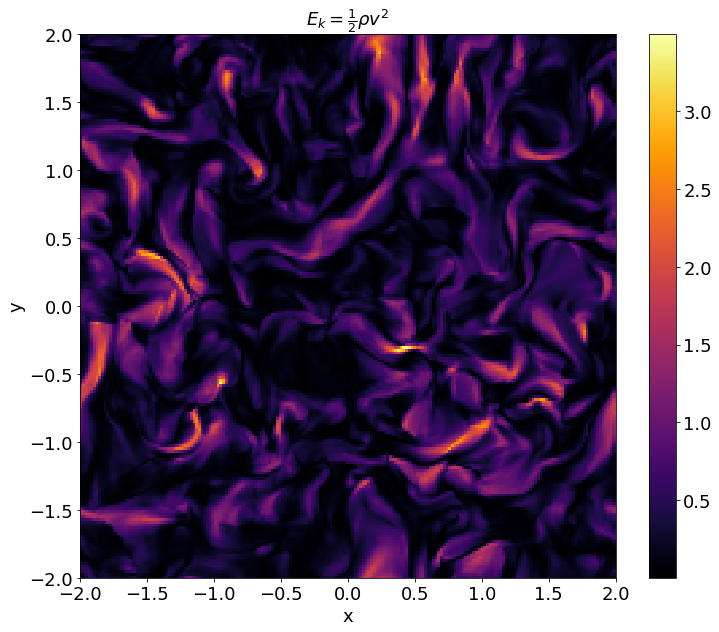

In [26]:
#plot of kinetic energy density projected in xy plane
fig, ax = plt.subplots(figsize = (12,10))

energy = kinetic_energy_density(rho_2D, vx1_2D, vx2_2D)
p = ax.pcolor(X, Y, energy, cmap = 'inferno')
# p = ax.pcolor(energy, cmap = 'inferno')
ax.set_title(r'$ E_{k} = \frac{1}{2} \rho v^2$', fontsize = 18)
ax.set_xlabel('x') 
ax.set_ylabel('y')

plt.colorbar(p)
plt.show()

# TASK 2: 

Carry out the 2D Fast Fourier Transform of the kinetic energy image that you produced above, and make a map of it.


### Reference:
https://github.com/ciencialatitud0/EPIC_2/blob/main/Day1/Basics-2/2b_fourier_transforms.ipynb

In [27]:
print(energy.shape)

(200, 200)


In [28]:
#Unshifted Fourier signal
fourier_energy = np.fft.fft2(energy)

#Shifted signal
shifted_fourier_energy = np.fft.fftshift(fourier_energy)

#Norms
norm_unshifted_ft = np.abs(fourier_energy)
norm_shifted_ft = np.abs(shifted_fourier_energy)


In [29]:
print(shifted_fourier_energy.shape)

(200, 200)


**Simple 2D map of FFT of the image**

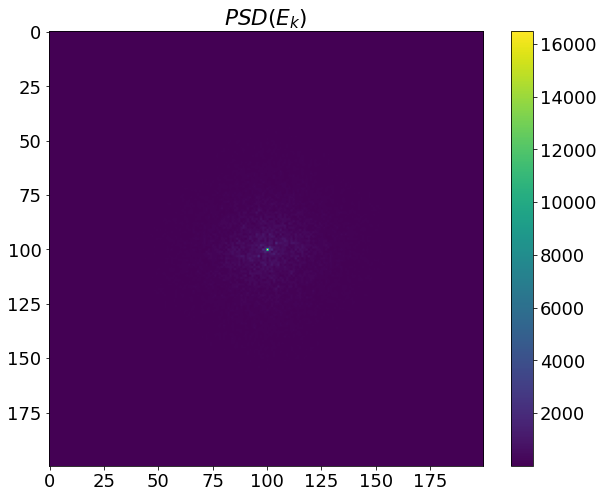

In [30]:
#Map of Fourier image

fig = plt.figure(figsize=(10,8))
p = plt.imshow(np.abs(shifted_fourier_energy))
plt.title(r'$PSD(E_{k})$')
plt.colorbar(p)
plt.show()

**Fourier image on the frequency mesh**

In [31]:
#frequencies or wave vectors 
freqs_x = np.fft.fftfreq(energy.shape[0], d=np.diff(X)[0][0])
freqs_y = np.fft.fftfreq(energy.shape[1], d=np.diff(X)[0][0])

# Creating mesh
freqs_X, freqs_Y = np.meshgrid(sorted(freqs_x), sorted(freqs_y))

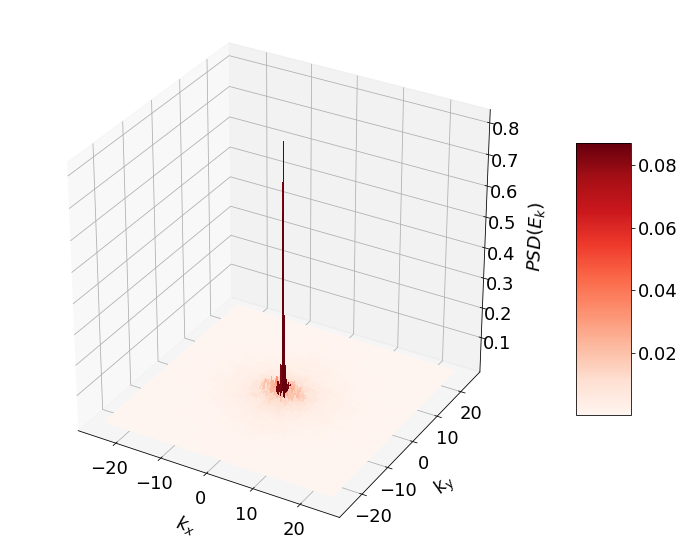

In [32]:
# Now we do some plotting:
fig = plt.figure(figsize = (12,10))

ax = plt.axes(projection='3d')
surf = ax.plot_surface(freqs_X, freqs_Y, (2/norm_shifted_ft.size)*norm_shifted_ft, cmap = "Reds", linewidth=0, antialiased=False)#

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel(r'$k_{x}$', labelpad = 15)  # Customised labels for axes
ax.set_ylabel(r'$k_{y}$', labelpad = 15)
ax.set_zlabel(r'$PSD(E_{k})$', labelpad = 15)

plt.show()

In [33]:
norm_shifted_ft.shape

(200, 200)

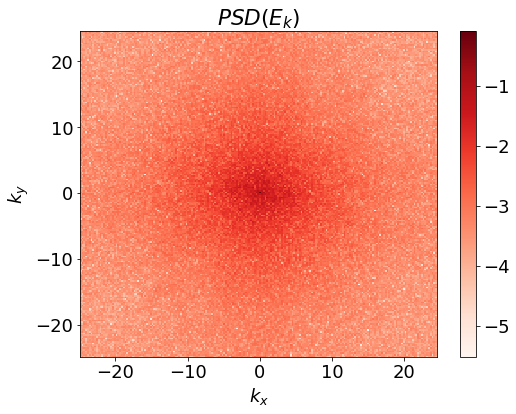

In [34]:
plt.figure(figsize = (8,6))

Z1 = plt.pcolor(freqs_X, freqs_Y, np.log10((2/norm_shifted_ft.size)*norm_shifted_ft), cmap = "Reds")

plt.colorbar(Z1)
plt.title(r'$PSD(E_{k})$')
plt.xlabel(r"$k_x$")
plt.ylabel(r"$k_y$")

plt.show()

# TASK 3: 

Use the function below to produce a 1D Fourier spectrum from the 2D Fourier image that you produced above. Make a log-log plot of the 1D Fourier spetrum. You should get a plot similar to the sketch shown here (in the "cascade of turbulence" section):

https://github.com/ciencialatitud0/EPIC_2/blob/main/Day1/Basics-2/2c_python_II_lecture.ipynb

### Note:
The GetPSD1D() function calculates the azimuthal summation and will allow you to test whether the spectrum of this turbulence snaphot follows Kolmogorov or not.





In [35]:
from scipy import ndimage

In [36]:
#===================================================================
# Get PSD 1D (total radial power spectrum)
#===================================================================
def GetPSD1D(psd2D):
    h  = psd2D.shape[0]
    w  = psd2D.shape[1]
    wc = w//2
    hc = h//2

    # create an array of integer radial distances from the center
    Y, X = np.ogrid[0:h, 0:w]
    r    = np.hypot(X - wc, Y - hc).astype(int)

    # SUM all psd2D pixels with label 'r' for 0<=r<=wc
    # NOTE: this will miss power contributions in 'corners' r>wc
    psd1D = ndimage.sum(psd2D, r, index=np.arange(0, wc))

    return psd1D
#===================================================================

# Taken from: https://medium.com/tangibit-studios/2d-spectrum-characterization-e288f255cc59

In [37]:
#We calculate de Power Density Distribution in 1D
psd1D = GetPSD1D(np.abs(shifted_fourier_energy)) 
psd1D.shape

(100,)

In [38]:
#We calculate positive wave vector in one direction
kp = freqs_x[:freqs_x.shape[0]//2]

In [39]:
kp.shape

(100,)

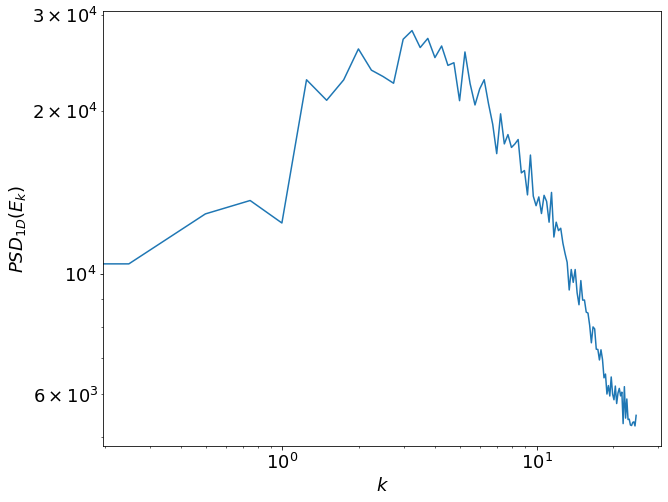

In [40]:
#Plot of PSD in 1D
fig, ax = plt.subplots(figsize=(10,8))

ax.loglog(kp, psd1D)
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$PSD_{1D}(E_{k})$')

plt.show()

# TASK 4: 

Now that you have produced the 1D Fourier spectrum of the kinetic energy, label the plot identifying the turbulence generation, transfer, and dissipation regions. Finally, carry out a linear regression considering only the points associated with the inertial range. Does the spectrum follow Kolmogorov spectrum, $E_k \propto k^{-\frac{5}{3}}$?

### Reference:

https://github.com/ciencialatitud0/EPIC_2/blob/main/Day1/Basics-1/Sesion_1_Data_analysis_with_PythonI.ipynb

**Energy Cascade profile**

<img src='https://www.researchgate.net/profile/J-Horacek/publication/41216043/figure/fig4/AS:652229530898432@1532515046401/Schematic-of-an-energy-cascade-a-Energy-injected-into-the-system-flows-into-large.png' width='500'>

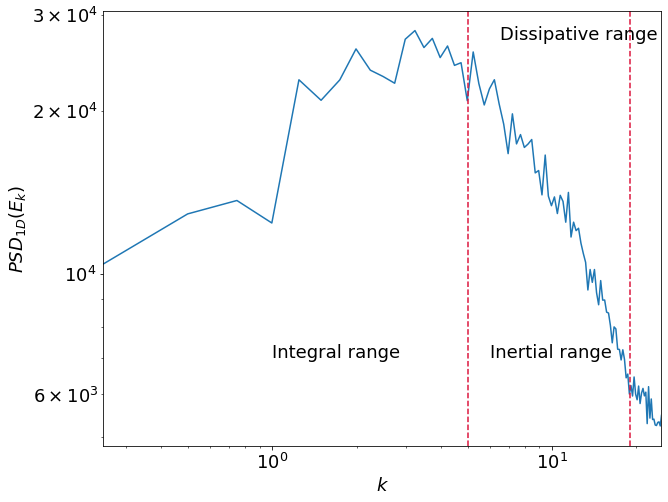

In [41]:
#Identification of regions in energy cascade

fig, ax = plt.subplots(figsize=(10,8))

ax.loglog(kp, psd1D)
ax.axvline(x= 5, linestyle = '--', c = 'crimson')
ax.axvline(x= 19, linestyle = '--', c = 'crimson')
ax.set_xlim(kp[1], kp[-1])
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$PSD_{1D}(E_{k})$')
plt.text(0.1e1, 0.7e4,  'Integral range')
plt.text(0.6e1, 0.7e4,  'Inertial range')
plt.text(0.65e1, 2.7e4,  'Dissipative range')

plt.show()

In [42]:
#We find the indices of k where the inertial range is bounded
 
np.where(np.round(kp,1)==5)

(array([20]),)

In [43]:
np.max(kp)

24.626249999999892

In [44]:
np.where(np.round(kp,0)==19)

(array([75, 76, 77, 78]),)

In [45]:
#We load curve_fit to make a fit
from scipy.optimize import curve_fit

In [46]:
#Function to fit data
#parameters: alpha, c
def Kolmogorov_spectrum(k, alpha, c):
  return c*k**(-alpha) #(-5./3.)

In [47]:
#We find the parameters using psd1D only for data between indices [20,76[ = [20, 75]
popt, pcov = curve_fit(Kolmogorov_spectrum, kp[20:76], psd1D[20:76])

In [48]:
popt

array([8.96188538e-01, 1.06409730e+05])

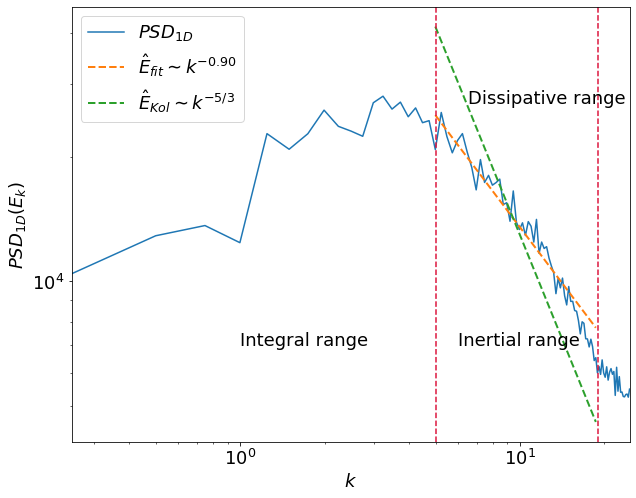

In [51]:
#Final plot of PSD with power law functions

fig, ax = plt.subplots(figsize=(10,8))

ax.loglog(kp, psd1D, label = r'$PSD_{1D}$')
ax.loglog(kp[20:76], Kolmogorov_spectrum(kp[20:76], popt[0], popt[1]), lw = 2, ls = '--', label=r'$\hat{E}_{fit} \sim k^{-%.2f}$'%(popt[0]))
ax.loglog(kp[20:76], Kolmogorov_spectrum(kp[20:76], 5/3, 6e5), lw = 2, ls = '--', label=r'$\hat{E}_{Kol} \sim k^{-5/3}$')
ax.axvline(x= 5, linestyle = '--', c = 'crimson')
ax.axvline(x= 19, linestyle = '--', c = 'crimson')
ax.set_xlim(kp[1], kp[-1])
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$PSD_{1D}(E_{k})$')
plt.text(0.1e1, 0.7e4,  'Integral range', fontsize=18)
plt.text(0.6e1, 0.7e4,  'Inertial range', fontsize=18)
plt.text(0.65e1, 2.7e4,  'Dissipative range', fontsize=18)
plt.legend(fontsize=18)
plt.show()

It is clear that the spectrum doesn't follow Kolmogorov theory in the inertial range. The power law exponent of the fitted function is different from the one predicted by Kolmogorov.

In [52]:
print('Kolmogorov exponent = %.2f'%(5/3))
print('Exponent of fitted function = %.2f'%(popt[0]))
print('Difference = %.2f'%(5/3 - popt[0]))

Kolmogorov exponent = 1.67
Exponent of fitted function = 0.90
Difference = 0.77
